## Load evaluation results

In [137]:
import polars as pl

pl.Config(tbl_rows=100)
pl.Config.set_tbl_formatting("ASCII_MARKDOWN")
pl.Config(fmt_str_lengths=1000)
pl.Config(tbl_width_chars=1000)

df = pl.read_csv("assets/results/*.csv")
df

shape: (540, 7)
| name                                              | optimizer | epoch | epoch_time | training_averaged_minibatch_loss | train_set_loss | validation_set_loss |
| ---                                               | ---       | ---   | ---        | ---                              | ---            | ---                 |
| str                                               | str       | i64   | f64        | f64                              | f64            | f64                 |
|---------------------------------------------------|-----------|-------|------------|----------------------------------|----------------|---------------------|
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 1     | 5.228375   | 1.99925                          | 1.755398       | 1.784894            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 2     | 5.399394   | 1.68303                          | 1.568278       | 1.601646            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 3     | 5.308831   | 1.548061                         | 1.448912       | 1.481731            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 4     | 5.511282   | 1.48164                          | 1.390348       | 1.432767            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 5     | 5.553778   | 1.422072                         | 1.35502        | 1.40386             |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 6     | 5.64584    | 1.376489                         | 1.28107        | 1.343399            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 7     | 5.837669   | 1.341387                         | 1.262214       | 1.348501            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 8     | 5.737927   | 1.317065                         | 1.20857        | 1.296622            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 9     | 6.019963   | 1.281016                         | 1.183413       | 1.26312             |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 10    | 5.880079   | 1.266074                         | 1.168306       | 1.281592            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 11    | 5.875063   | 1.244896                         | 1.179797       | 1.288776            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 12    | 5.907367   | 1.225383                         | 1.149752       | 1.283228            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 13    | 5.998569   | 1.205852                         | 1.084202       | 1.206602            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 14    | 6.071132   | 1.187459                         | 1.076846       | 1.213912            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 15    | 6.021013   | 1.168897                         | 1.068813       | 1.225552            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 16    | 5.905032   | 1.163344                         | 1.075622       | 1.235309            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 17    | 6.156264   | 1.151046                         | 1.061579       | 1.219445            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 18    | 6.151277   | 1.128454                         | 1.003903       | 1.168264            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 19    | 5.966121   | 1.114036                         | 1.002315       | 1.191179            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 20    | 6.066105   | 1.102392                         | 0.978786       | 1.163105            |
| ConvViT 2xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 21    | 6.10248    | 1.094894                         

## Find the model with the best validation loss

In [138]:
# print(df.group_by(["name", "optimizer"]).agg(pl.min("validation_set_loss")).sort("validation_set_loss"))

results = df.group_by([
    "name", "optimizer"
]).agg(
    pl.col("validation_set_loss").min().alias("loss"),
    pl.col("epoch_time").mean().alias("avg_epoch_time"),
    pl.col("epoch").sort_by("validation_set_loss").first()
).sort("loss")
print(results)


shape: (18, 5)
| name                                              | optimizer | loss     | avg_epoch_time | epoch |
| ---                                               | ---       | ---      | ---            | ---   |
| str                                               | str       | f64      | f64            | i64   |
|---------------------------------------------------|-----------|----------|----------------|-------|
| ViT (patch_size=4, dim=64, mlp_dim=128)           | AdamW     | 0.989885 | 13.489941      | 19    |
| ViT (patch_size=2, dim=32, mlp_dim=64)            | AdamW     | 1.006177 | 81.492382      | 27    |
| ConvViT 2xConv (patch_size=4, dim=32, mlp_dim=64) | AdamW     | 1.019447 | 3.80473        | 29    |
| ConvViT 3xConv (patch_size=2, dim=32, mlp_dim=64) | AdamW     | 1.021197 | 3.779347       | 29    |
| ViT (patch_size=4, dim=32, mlp_dim=64)            | AdamW     | 1.021513 | 12.166541      | 25    |
| ViT (patch_size=4, dim=128, mlp_dim=256)          | AdamW     | 1

## Plot the results

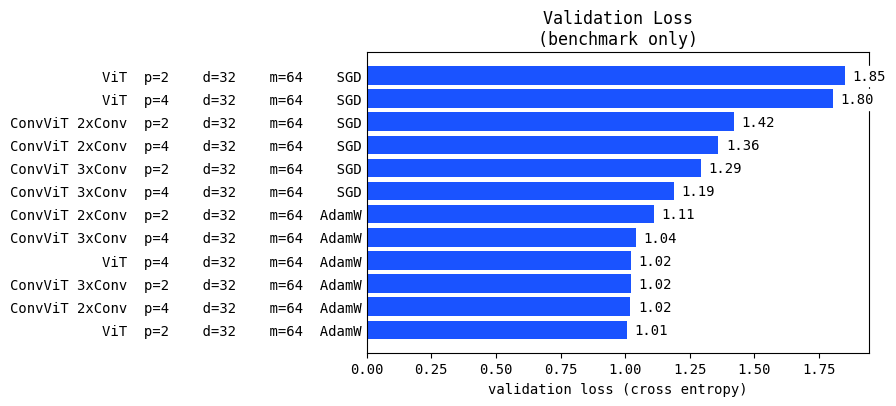

In [122]:

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "monospace"

def plot_losses(results, title_suffix=""):
    fig = plt.figure(figsize=(9, 5/(18/(3+len(results)))))
    ax = plt.subplot()  # Needs to specify axes_class

    x = range(len(results))
    ax.barh(y=x, width=results["loss"].to_numpy(), color="#1a53ff")

    model_names = results["name"].to_list()
    optim_names = results["optimizer"].to_list()

    simple_model_names = [name.split("(")[0] for name in model_names]
    model_params = [name.split("(")[1].replace(")", "") for name in model_names]
    patch_size = [s.split(",")[0].replace("patch_size", "p") for s in model_params]
    dim = [s.split(",")[1].replace("dim", "d") for s in model_params]
    mlp_dim = [s.split(",")[2].replace("mlp_dim", "m") for s in model_params]
    names = [f"{m} {p:>3} {d:>7} {mlp:>7} {o:>6}" for m, p, d, mlp, o in zip(simple_model_names, patch_size, dim, mlp_dim, optim_names)]

    # fig.set_size_inches(12, 8, forward=True) 
    ax.set_yticks(range(len(x)), names, ha="right")
    yax = ax.get_yaxis()

    for i, v in enumerate(results["loss"]):
        t = ax.text(v + 0.03, i - 0.2, f"{v:.2f}", color="black")
        t.set_bbox(dict(facecolor="white", edgecolor="white", pad=2.5))
    ax.set_xlabel("validation loss (cross entropy)")
    plt.title(f"Validation Loss{title_suffix}")

    plt.tick_params(axis="y", length=0)

    plt.tight_layout()
    title_suffix = title_suffix.replace(" ","_").replace("\n","")
    plt.savefig(f"assets/report/validation{title_suffix}.png", bbox_inches="tight", dpi=400)
    plt.show()

plot_losses(results)
plot_losses(results.filter(pl.col("name").str.contains("dim=32")), "\n(benchmark only)")

## Training time per epoch

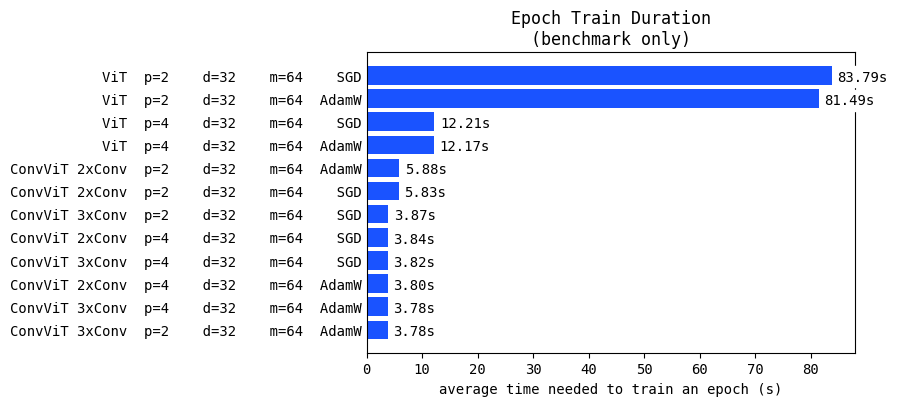

In [125]:


def plot_epoch_times(results, title_suffix=""):
    fig = plt.figure(figsize=(9, 5/(18/(3+len(results)))))
    ax = plt.subplot()

    results = results.sort("avg_epoch_time")
    x = range(len(results))
    ax.barh(y=x, width=results["avg_epoch_time"].to_numpy(), color="#1a53ff")

    model_names = results["name"].to_list()
    optim_names = results["optimizer"].to_list()

    simple_model_names = [name.split("(")[0] for name in model_names]
    model_params = [name.split("(")[1].replace(")", "") for name in model_names]
    patch_size = [s.split(",")[0].replace("patch_size", "p") for s in model_params]
    dim = [s.split(",")[1].replace("dim", "d") for s in model_params]
    mlp_dim = [s.split(",")[2].replace("mlp_dim", "m") for s in model_params]
    names = [f"{m} {p:>3} {d:>7} {mlp:>7} {o:>6}" for m, p, d, mlp, o in zip(simple_model_names, patch_size, dim, mlp_dim, optim_names)]
    ax.set_yticks(range(len(x)), names, ha="right")

    for i, v in enumerate(results["avg_epoch_time"]):
        t = ax.text(v + 1, i - 0.24, f"{v:.2f}s", color="black")
        t.set_bbox(dict(facecolor="white", edgecolor="white", pad=2.5))
    ax.set_xlabel("average time needed to train an epoch (s)")
    plt.title(f"Epoch Train Duration{title_suffix}")

    plt.tick_params(axis="y", length=0)

    plt.tight_layout()
    title_suffix = title_suffix.replace(" ","_").replace("\n","")
    plt.savefig(f"assets/report/epoch_time{title_suffix}.png", bbox_inches="tight", dpi=400)
    plt.show()
plot_epoch_times(results)
plot_epoch_times(results.filter(pl.col("name").str.contains("dim=32")), "\n(benchmark only)")


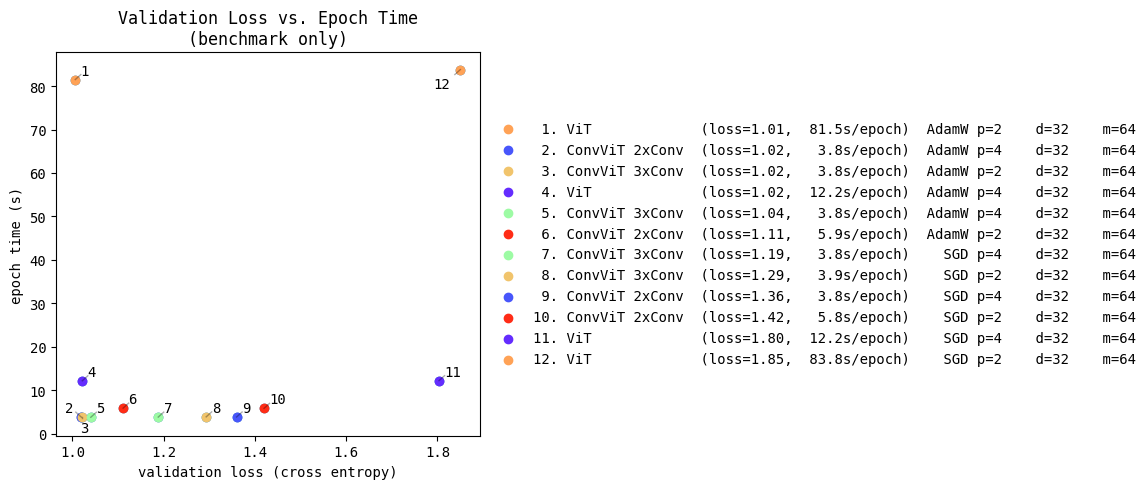

In [126]:

import numpy as np
random = np.arange(len(results))
np.random.seed(4)
np.random.shuffle(random)
lookup = {}
for i, name in enumerate(results["name"]):
   lookup[name] = random[i]

def scatter_results(results, title_suffix=""):
    from matplotlib import colormaps as cm, ticker

    results = results.sort("loss")

    model_names = results["name"].to_list()
    optim_names = results["optimizer"].to_list()

    simple_model_names = [name.split("(")[0] for name in model_names]
    model_params = [name.split("(")[1].replace(")", "") for name in model_names]
    patch_size = [s.split(",")[0].replace("patch_size", "p") for s in model_params]
    dim = [s.split(",")[1].replace("dim", "d") for s in model_params]
    mlp_dim = [s.split(",")[2].replace("mlp_dim", "m") for s in model_params]

    model_idxs = np.arange(1, len(model_names) + 1)
    times = [f"{t:.1f}" for t in results["avg_epoch_time"]]
    names = [f"{id:>2}. {m:<15} (loss={loss:.2f}, {t:>5}s/epoch) {o:>6} {p:>3} {d:>7} {mlp:>7}" for id, loss, t, m, p, d, mlp, o in zip(model_idxs, results["loss"], times, simple_model_names, patch_size, dim, mlp_dim, optim_names)]

    fig, axs = plt.subplots(1, 2, figsize=(11.5, 5), width_ratios=[0.40, 0.60])  # Needs to specify axes_classj

    axs[0].scatter(results["loss"], results["avg_epoch_time"], )
    axs[0].set_xlabel("validation loss (cross entropy)")
    axs[0].set_ylabel("epoch time (s)")
    axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

    for i, (text, model_name) in enumerate(zip(names,model_names)):
        color = cm.get_cmap("rainbow")((lookup[model_name]) / len(random))
        axs[0].scatter(results["loss"][i], results["avg_epoch_time"][i], label=names[i], color=color)

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', facecolor="white", edgecolor="white")

    import textalloc as ta
    np.random.seed(0)
    ta.allocate_text(
        fig,
        axs[0],
        results["loss"], results["avg_epoch_time"],
        [f"{id}" for id in model_idxs],
        # x_scatter=results["loss"], y_scatter=results["avg_epoch_time"],
        min_distance=0.013,
        max_distance=0.2,
        margin=0.011,
        # scatter_sizes=[4]*len(model_idxs),
        draw_lines=True,
        linecolor="#00000050",
        textsize=10,
        seed=2
    )

    axs[0].set_title(f"Validation Loss vs. Epoch Time{title_suffix}")
    plt.delaxes(axs[1])
    plt.tight_layout()
    title_suffix = title_suffix.replace(" ","_").replace("\n","")
    plt.savefig(f"assets/report/loss_vs_epoch_time{title_suffix}.png", bbox_inches="tight", dpi=400)
    plt.show()
    
scatter_results(results)
scatter_results(results.filter(pl.col("name").str.contains("dim=32")), "\n(benchmark only)")


## Evaluate on test dataset



As this project is focused on the possible improvement, two networks will be evaluated. This approach differs from standard one when the best model so far is evaluated on test data.

Best ViT: 
`ViT (patch_size=4, dim=64, mlp_dim=128)` optimizer: `AdamW`, epoch: `19`
Best modified: 
`ConvViT 2xConv (patch_size=4, dim=32, mlp_dim=64)` optimizer: `AdamW`, epoch: `29`


Load test data

In [6]:
from common import *
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

test_set = datasets.CIFAR10(  # Will not be used here just testing classes and size
    root=CIFAR_PATH,
    train=False,
    download=False,
    transform=ToTensor()
)
classes = test_set.classes

TEST_BATCH_SIZE = 2048
N_CLASSES = len(classes)

test_loader = DataLoader(
    test_set,
    batch_size=TEST_BATCH_SIZE,
    shuffle=True,
    num_workers=2,
)



In [118]:
import torch
from matplotlib import pyplot as plt
import torch.optim as optim
import torch.nn as nn
from vit_pytorch import ViT
from matplotlib.ticker import MaxNLocator
import time
from matplotlib import pyplot as plt
from IPython.display import clear_output
from common import *

torch.manual_seed(0)


class Configuration:
    def __init__(self, name, net, description):
        self.name = name
        self.net = net
        self.description = description

    @staticmethod
    def from_tuple(name, net_params):
        net, description = net_params
        return Configuration(name, net, description)


def create_basic_vit(
        num_classes,
        image_size,
        patch_size,
        dim,
        depth,
        heads,
        mlp_dim,
        dropout,
        emb_dropout,
        channels=3
):
    net = ViT(
        num_classes=num_classes,
        image_size=image_size,
        patch_size=patch_size,
        dim=dim,
        depth=depth,
        heads=heads,
        mlp_dim=mlp_dim,
        dropout=dropout,
        emb_dropout=emb_dropout,
        channels=channels
    )

    params = {
        "num_classes": num_classes,
        "image_size": image_size,
        "patch_size": patch_size,
        "dim": dim,
        "depth": depth,
        "heads": heads,
        "mlp_dim": mlp_dim,
        "dropout": dropout,
        "emb_dropout": emb_dropout,
    }

    return net, params


class ConvViT(nn.Module):
    def __init__(
            self,
            convolutions,
            num_classes,
            image_size=256,
            patch_size=32,
            dim=1024,
            depth=6,
            heads=8,
            mlp_dim=2048,
            dropout=0.1,
            emb_dropout=0.1
    ):
        super().__init__()
        modules = []
        channels = 3
        output_channels = 3
        for conv in range(convolutions):
            output_channels = 2 * channels
            modules.append(nn.Conv2d(channels, output_channels, 3, padding=1, padding_mode="zeros"))
            modules.append(nn.MaxPool2d((2, 2)))
            modules.append(nn.ReLU())
            channels = output_channels

        self.conv_part = nn.Sequential(*modules)

        vit_net, description = create_basic_vit(
            num_classes=num_classes,
            image_size=image_size // 2 ** channels,
            patch_size=patch_size,
            dim=dim,
            depth=depth,
            heads=heads,
            mlp_dim=mlp_dim,
            dropout=dropout,
            emb_dropout=emb_dropout,
            channels=output_channels
        )
        self.description = description
        self.vit_net = vit_net

    def forward(self, x):
        convoluted = self.conv_part(x)
        logits = self.vit_net(convoluted)
        return logits


conv_vit_b = ConvViT(
    convolutions=2,
    image_size=32,
    patch_size=4,
    dim=32,
    depth=6,
    heads=8,
    mlp_dim=64,
    dropout=0.1,
    emb_dropout=0.1,
    num_classes=N_CLASSES
)

models = [
    (Configuration.from_tuple(
        "ViT (patch_size=4, dim=64, mlp_dim=128)", create_basic_vit(
            image_size=32,
            patch_size=4,
            dim=64,
            depth=6,
            heads=8,
            mlp_dim=128,
            dropout=0.1,
            emb_dropout=0.1,
            num_classes=N_CLASSES
        )
    ),19),
    (Configuration(
        "ConvViT 2xConv (patch_size=4, dim=32, mlp_dim=64)",
        conv_vit_b,
        conv_vit_b.description
    ),29),
]


def one_hot(batched_label_indices, num_classes):
    batch_size = batched_label_indices.shape[0]
    target = torch.zeros((batch_size, num_classes))

    for sample in range(batch_size):
        target[sample, batched_label_indices[sample]] = 1

    return target


device_name = "cuda:0" if torch.cuda.is_available() else "cpu"
device = torch.device(device_name)


def eval_model(net, dataloader, criterion):
    with torch.no_grad():
        net.eval()

        running_loss = 0
        processed_samples = 0
        for i, data in enumerate(dataloader):
            inputs, labels = data
            processed_samples += inputs.shape[0]
            # print(f"Eval: {processed_samples}/{len(dataloader.dataset)}")

            inputs = inputs.to(device)
            target = one_hot(labels, N_CLASSES).to(device)
            del labels

            outputs = net(inputs)
            assert outputs.shape == target.shape

            loss = criterion(outputs, target)
            running_loss += loss.item()

        return running_loss / len(dataloader)


results = []
for model,epoch in models:
    net = model.net
    checkpoint_name = f"{model.name.replace(' ', '_')}_AdamW_epoch-{epoch}.chkpt"
    net.load_state_dict(torch.load(f"assets/checkpoints/{checkpoint_name}"))
    net.to(device)

    print(f"Evaluating {model.name} model (epoch={epoch}) on test set...")
    criterion = nn.CrossEntropyLoss().to(device)
    loss = eval_model(net, test_loader, criterion)
    print(f"loss: {loss}")
    
    results.append({
        "name": model.name,
        "loss": loss
    })

df = pl.DataFrame(results)
print(df)



Evaluating ViT (patch_size=4, dim=64, mlp_dim=128) model (epoch=19) on test set...
loss: 1.006818425655365
Evaluating ConvViT 2xConv (patch_size=4, dim=32, mlp_dim=64) model (epoch=29) on test set...
loss: 0.9911745905876159
shape: (2, 2)
| name                                              | loss     |
| ---                                               | ---      |
| str                                               | f64      |
|---------------------------------------------------|----------|
| ViT (patch_size=4, dim=64, mlp_dim=128)           | 1.006818 |
| ConvViT 2xConv (patch_size=4, dim=32, mlp_dim=64) | 0.991175 |


It seems that ConvViT 2xConv model is better but keep in mind that the Cifar dataset is relatively tiny in context of deep learning.